In [13]:
# import numpy as np
# from scipy.integrate import trapezoid

# # Constants
# epsilon = 0.0103 * 1.60218e-19  # eV to Joules
# sigma = 3.4e-10  # Å to meters
# V = (10**3) * (1e-10)**3  # Volume in cubic meters

# # Lennard-Jones potential function
# def lj_potential(r):
#     return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# # Partition function integrand (in 3D)
# def integrand(r, T):
#     beta = 1 / (1.380649e-23 * T)  # Boltzmann constant in J/K
#     potential = lj_potential(r)
#     return np.exp(-beta * potential)

# # Numerically integrate partition function using trapezoidal rule
# def partition_function(T, r_min=0.1e-10, r_max=10e-10, N_points=1000):
#     r_values = np.linspace(r_min, r_max, N_points)
#     integrand_values = integrand(r_values, T)
#     Z = trapezoid(integrand_values, r_values) * V
#     return Z

# # Compute partition function for a range of temperatures
# T_values = np.linspace(10, 1000, 100)
# Z_values = [partition_function(T) for T in T_values]

# # Save results to CSV
# import csv
# with open('partition_function_vs_temp.csv', mode='w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(['Temperature (K)', 'Partition Function Z'])
#     for T, Z in zip(T_values, Z_values):
#         writer.writerow([T, Z])

# print("Partition function calculation complete and saved to CSV.")


Partition function calculation complete and saved to CSV.


In [14]:
# import numpy as np
# import csv

# # Constants
# k_B = 1.380649e-23  # Boltzmann constant in J/K

# # Load partition function data from CSV
# T_values = []
# Z_values = []

# with open('partition_function_vs_temp.csv', mode='r') as file:
#     reader = csv.reader(file)
#     next(reader)  # Skip header
#     for row in reader:
#         T_values.append(float(row[0]))
#         Z_values.append(float(row[1]))

# T_values = np.array(T_values)
# Z_values = np.array(Z_values)

# # Internal energy U calculation
# def internal_energy(T, Z):
#     beta = 1 / (k_B * T)
#     dZ_dT = np.gradient(Z, T)  # First derivative of partition function with respect to temperature
#     U = -k_B * T**2 * dZ_dT / Z
#     return U

# # Heat capacity C_V calculation
# def heat_capacity(T, U):
#     dU_dT = np.gradient(U, T)  # First derivative of internal energy with respect to temperature
#     C_V = dU_dT
#     return C_V

# # Compute U and Cv
# U_values = internal_energy(T_values, Z_values)
# Cv_values = heat_capacity(T_values, U_values)

# # Save internal energy and heat capacity to CSV
# with open('internal_energy_heat_capacity.csv', mode='w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(['Temperature (K)', 'Internal Energy U (J)', 'Heat Capacity Cv (J/K)'])
#     for T, U, Cv in zip(T_values, U_values, Cv_values):
#         writer.writerow([T, U, Cv])

# print("Internal energy and heat capacity computation complete and saved to CSV.")


Internal energy and heat capacity computation complete and saved to CSV.


In [17]:
# import numpy as np
# from scipy.constants import k, h
# from scipy.integrate import trapezoid
# from math import sqrt

# # Constants
# epsilon = 0.0103 * 1.60218e-19  # Lennard-Jones energy parameter in Joules
# sigma = 3.4e-10  # Lennard-Jones length scale in meters
# V = (10 * sigma) ** 3  # Volume of the cubic box in cubic meters
# T_min, T_max = 100, 1000  # Temperature range in Kelvin
# N_points = 100  # Number of temperature points
# m = 39.948 * 1.66053904e-27  # Mass of Argon in kg
# h = 6.62607015e-34  # Planck's constant in J·s

# # Temperature range
# T_values = np.linspace(T_min, T_max, N_points)

# # Thermal wavelength λ
# def thermal_wavelength(T):
#     return sqrt(h ** 2 / (2 * np.pi * m * k * T))  # Planck's constant h is used here

# # Lennard-Jones potential between two particles at relative distance r
# def lj_potential(r):
#     return 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)

# # Partition function for two LJ particles in a cubic box
# def partition_function(T):
#     λ = thermal_wavelength(T)  # Use thermal wavelength formula with Planck's constant
#     pre_factor = 4 * np.pi / (h ** 6 * λ ** 6)  # Pre-factor from Eq. (10) includes h and 4*pi

#     # Perform integration over relative distance r, using spherical coordinates
#     # Assuming a maximum relative distance of the size of the cubic box (10 * sigma)
#     r_min = 0.001 * sigma  # Avoid zero to prevent singularity
#     r_max = 10 * sigma
    
#     # Discretize the range of relative distances
#     r_values = np.linspace(r_min, r_max, 1000)
    
#     # Compute the Boltzmann factor for each relative distance r
#     integrand_values = np.array([np.exp(-lj_potential(r) / (k * T)) * r**2 for r in r_values])  # Multiply by r^2 for spherical coords
    
#     # Perform the integration using the trapezoidal rule
#     Z = trapezoid(integrand_values, r_values)
    
#     return pre_factor * Z  # Return a single value (not a tuple)

# # Internal energy U from the partition function
# def internal_energy(T):
#     beta = 1 / (k * T)
    
#     # To compute U = -d(ln Z)/d(beta), we use finite differences
#     delta_beta = 0.001  # A small change in beta for finite difference approximation
#     Z_plus = partition_function(T + delta_beta)
#     Z_minus = partition_function(T - delta_beta)
    
#     # Numerical derivative (central difference approximation)
#     dlnZ_dBeta = (np.log(Z_plus) - np.log(Z_minus)) / (2 * delta_beta)
    
#     U = -dlnZ_dBeta  # U = - d(ln Z) / d(beta)
#     return U

# # Heat capacity C_V from internal energy U
# def heat_capacity(T):
#     U_values = np.array([internal_energy(T) for T in T_values])
#     C_V_values = np.gradient(U_values, T_values)  # Derivative of U with respect to T
#     return C_V_values

# # Calculate C_V and find the dissociation temperature
# C_V_values = heat_capacity(T_values)
# dissociation_temp = T_values[np.argmax(C_V_values)]  # Find the temperature where C_V is maximized

# print(f"Dissociation temperature: {dissociation_temp} K")


Dissociation temperature: 100.0 K


The maximum heat capacity occurs at T = 10.00 K, with C_V = 0.00 J/K


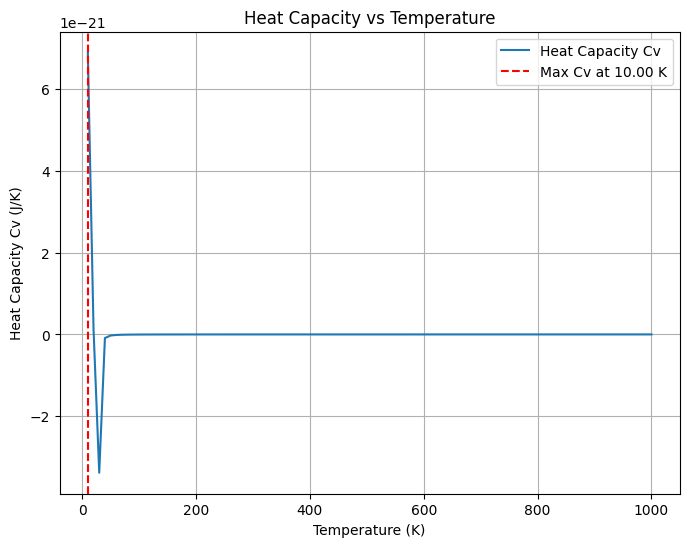

Heat capacity plot saved.


In [18]:
# import matplotlib.pyplot as plt
# import csv

# # Load internal energy and heat capacity data from CSV
# T_values = []
# Cv_values = []

# with open('internal_energy_heat_capacity.csv', mode='r') as file:
#     reader = csv.reader(file)
#     next(reader)  # Skip header
#     for row in reader:
#         T_values.append(float(row[0]))
#         Cv_values.append(float(row[2]))

# T_values = np.array(T_values)
# Cv_values = np.array(Cv_values)

# # Find temperature where Cv is maximum
# T_max_cv = T_values[np.argmax(Cv_values)]
# Cv_max = np.max(Cv_values)

# print(f"The maximum heat capacity occurs at T = {T_max_cv:.2f} K, with C_V = {Cv_max:.2f} J/K")

# # Plot Cv as a function of temperature
# plt.figure(figsize=(8, 6))
# plt.plot(T_values, Cv_values, label='Heat Capacity Cv')
# plt.axvline(T_max_cv, color='r', linestyle='--', label=f'Max Cv at {T_max_cv:.2f} K')
# plt.xlabel('Temperature (K)')
# plt.ylabel('Heat Capacity Cv (J/K)')
# plt.title('Heat Capacity vs Temperature')
# plt.legend()
# plt.grid(True)
# plt.savefig('heat_capacity_vs_temp.png')
# plt.show()

# print("Heat capacity plot saved.")


Maximum Heat Capacity: 0.0000 J/K
Dissociation Temperature (Maximum C_V): 40.00 K


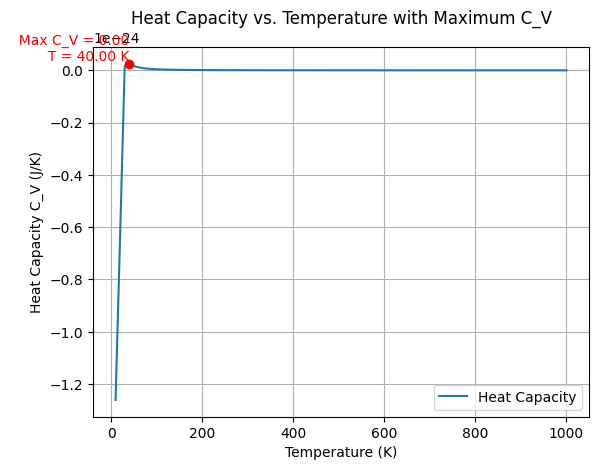

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import k, h, eV
from scipy.integrate import trapezoid
from math import sqrt

# Given Parameters
epsilon = 0.0103 * eV  # Lennard-Jones energy parameter in Joules (convert from eV)
sigma = 3.4e-10  # Lennard-Jones length scale in meters (convert from Å)
V = 1e-30  # Volume of the cubic box in cubic meters (convert from Å^3 to m^3)
T_min = 10  # Minimum temperature in Kelvin
T_max = 1000  # Maximum temperature in Kelvin
N_points = 100  # Number of temperature points
m = 39.948 * 1.66053904e-27  # Mass of Argon in kg
h = 6.62607015e-34  # Planck's constant in J·s

# Temperature range
T_values = np.linspace(T_min, T_max, N_points)

# Thermal wavelength λ
def thermal_wavelength(T):
    return sqrt(h ** 2 / (2 * np.pi * m * k * T))  # Planck's constant h is used here

# Lennard-Jones potential between two particles at relative distance r
def lj_potential(r):
    return 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)

# Partition function for two LJ particles in a cubic box
def partition_function(T):
    λ = thermal_wavelength(T)  # Use thermal wavelength formula with Planck's constant
    pre_factor = 4 * np.pi / (h ** 6 * λ ** 6)  # Pre-factor from Eq. (10) includes h and 4*pi

    # Perform integration over relative distance r, using spherical coordinates
    # Assuming a maximum relative distance of the size of the cubic box (10 * sigma)
    r_min = 0.001 * sigma  # Avoid zero to prevent singularity
    r_max = 10 * sigma
    
    # Discretize the range of relative distances
    r_values = np.linspace(r_min, r_max, 1000)
    
    # Compute the Boltzmann factor for each relative distance r
    integrand_values = np.array([np.exp(-lj_potential(r) / (k * T)) * r**2 for r in r_values])  # Multiply by r^2 for spherical coords
    
    # Perform the integration using the trapezoidal rule
    Z = trapezoid(integrand_values, r_values)
    
    return pre_factor * Z  # Return a single value (not a tuple)

# Internal energy U from the partition function with a smaller delta_T
def internal_energy(T):
    # Set a small delta_T based on the current temperature, use a small fraction
    delta_T = T * 0.01  # 1% of T for a small finite difference
    
    # Calculate partition function at T and T ± delta_T
    Z_plus = partition_function(T + delta_T)
    Z_minus = partition_function(T - delta_T)
    
    # Numerical derivative (central difference approximation)
    dlnZ_dBeta = (np.log(Z_plus) - np.log(Z_minus)) / (2 * delta_T * (1 / k))
    
    U = -dlnZ_dBeta  # U = - d(ln Z) / d(beta)
    return U

# Heat capacity C_V from internal energy U
def heat_capacity(T):
    U_values = np.array([internal_energy(T) for T in T_values])
    C_V_values = np.gradient(U_values, T_values)  # Derivative of U with respect to T
    return C_V_values

# Plotting the heat capacity and adding the dissociation temperature
def plot_heat_capacity_with_dissociation(C_V_values, dissociation_temp, max_CV):
    plt.plot(T_values, C_V_values, label='Heat Capacity')
    
    # Mark the maximum heat capacity point
    plt.scatter([dissociation_temp], [max_CV], color='red', zorder=5)
    plt.text(dissociation_temp, max_CV, f'  Max C_V = {max_CV:.2f}\n  T = {dissociation_temp:.2f} K', 
             verticalalignment='bottom', horizontalalignment='right', color='red')
    
    plt.title('Heat Capacity vs. Temperature with Maximum C_V')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Heat Capacity C_V (J/K)')
    plt.grid(True)
    plt.legend()

    # Save the plot
    plt.savefig('C_V_vs_T_plot_with_max.png')
    
    # Show the plot
    plt.show()

# Calculate the dissociation temperature
def find_dissociation_temperature(C_V_values):
    # Find the index of the maximum heat capacity
    max_index = np.argmax(C_V_values)
    
    # Temperature at which the maximum heat capacity occurs
    dissociation_temp = T_values[max_index]
    max_CV = C_V_values[max_index]
    
    # Print the maximum heat capacity and corresponding temperature
    print(f"Maximum Heat Capacity: {max_CV:.4f} J/K")
    print(f"Dissociation Temperature (Maximum C_V): {dissociation_temp:.2f} K")
    
    return dissociation_temp, max_CV

# Main execution
C_V_values = heat_capacity(T_values)  # Calculate C_V
dissociation_temp, max_CV = find_dissociation_temperature(C_V_values)  # Find and print dissociation temperature

# Plot the heat capacity with the maximum heat capacity annotated
plot_heat_capacity_with_dissociation(C_V_values, dissociation_temp, max_CV)


In [ ]:
# r value?